AttributeError: module 'matplotlib.pyplot' has no attribute 'Fun'

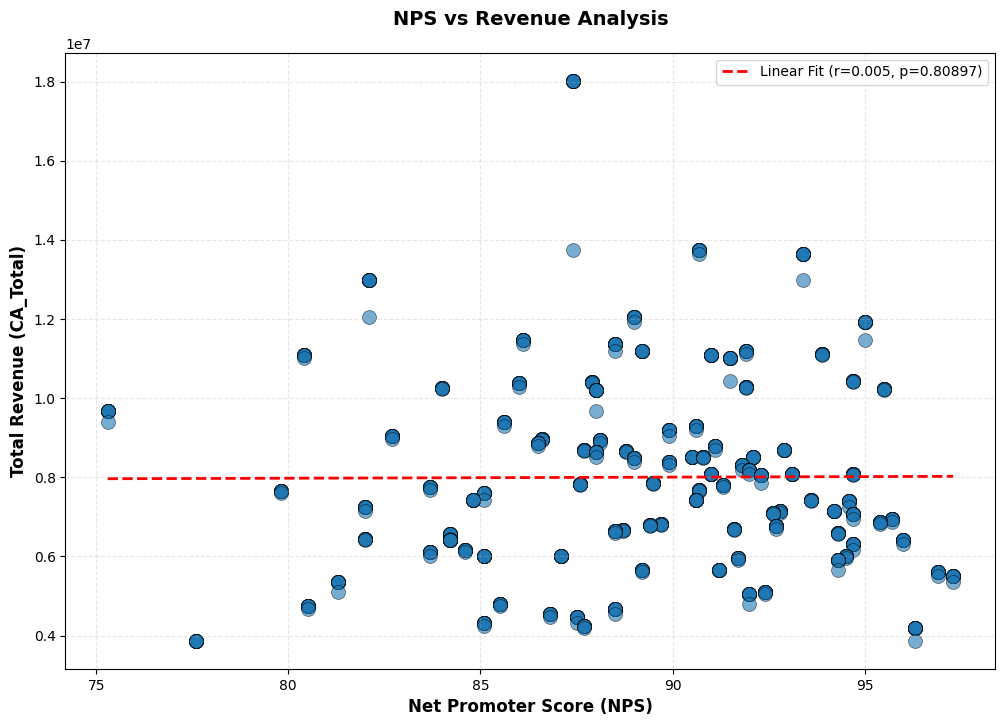

In [4]:
# =====================================================================
# NPS vs Revenue Analysis (Consulting-Quality Output)
# =====================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# -----------------------------
# Load data
# -----------------------------
df = pd.read_csv("merged_data_clean.csv")

# -----------------------------
# Clean & prepare data
# -----------------------------
plot_data = df[['agency_id', 'NPS', 'CA_Total']].dropna()

# Remove invalid values
plot_data = plot_data[(plot_data['NPS'] >= 0) & (plot_data['NPS'] <= 100)]
plot_data = plot_data[plot_data['CA_Total'] > 0]

# -----------------------------
# Statistical Analysis
# -----------------------------
corr, p_value = stats.pearsonr(plot_data['NPS'], plot_data['CA_Total'])
corr = round(corr, 3)
p_value = round(p_value, 5)

# Linear regression line
z = np.polyfit(plot_data['NPS'], plot_data['CA_Total'], 1)
p = np.poly1d(z)
x_vals = np.linspace(plot_data['NPS'].min(), plot_data['NPS'].max(), 100)
y_vals = p(x_vals)

# -----------------------------
# Create the plot
# -----------------------------
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(plot_data['NPS'], plot_data['CA_Total'], 
           alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

# Regression line
plt.plot(x_vals, y_vals, 'r--', linewidth=2, 
         label=f'Linear Fit (r={corr}, p={p_value})')

# Labels and formatting
plt.xlabel('Net Promoter Score (NPS)', fontsize=12, fontweight='bold')
plt.ylabel('Total Revenue (CA_Total)', fontsize=12, fontweight='bold')
plt.title('NPS vs Revenue Analysis', fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')

# Format y-axis as currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.Fun)